In [1]:
import pandas as pd

In [3]:
data = pd.read_excel('last_2.xlsx')

In [5]:
data.head(3)

,Точка,Тип,Препарат,Значение_1,Значение_2,Значение_3,Значение_4,Значение_5,Значение_6,Значение_7,Значение_8
0,1,Сфероиды с микросферами,Цисплатин средняя конц.,2168.6,1335.0,1554.0,1587.0,1298.0,1594.0,1089.0,1075.0
1,1,Сфероиды с микросферами,Цисплатин низкая конц.,1476.0,1590.0,1454.0,1293.0,1254.0,1188.0,1667.0,2358.6
2,1,Сфероиды с микросферами,Средняя конц. 2 ант.,1200.0,817.0,915.0,1333.0,1160.0,1155.0,1282.0,1367.0


In [7]:
value_columns = ['Значение_1', 'Значение_2', 'Значение_3',
                 'Значение_4', 'Значение_5', 'Значение_6',
                 'Значение_7', 'Значение_8']

In [9]:
from scipy.stats import shapiro 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

data['normal_check'] = data.apply(lambda x: shapiro(list(x[value_columns]))[1] > 0.05, axis=1)
data['shapiro_p_value'] = data.apply(lambda x: shapiro(list(x[value_columns]))[1], axis=1)

In [11]:
data[~data['normal_check']].head(3)

,Точка,Тип,Препарат,Значение_1,Значение_2,Значение_3,Значение_4,Значение_5,Значение_6,Значение_7,Значение_8,normal_check,shapiro_p_value
13,3,Сфероиды с микросферами,Цисплатин низкая конц.,1515.0,1765.0,1467.0,1606.0,2275.0,1708.0,1706.0,3164.85,False,0.007068
17,3,Сфероиды с микросферами,Высокая конц. 2 ант.,813.0,661.0,619.0,664.0,821.0,669.0,609.0,593.00,False,0.044565
18,4,Сфероиды с микросферами,Цисплатин средняя конц.,1018.0,839.0,1119.0,1090.0,819.0,1044.0,1804.9,1151.00,False,0.017601


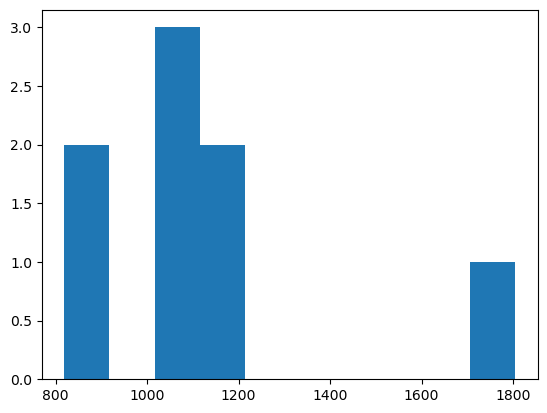

In [17]:
plt.hist(data[~data['normal_check']][value_columns].iloc[2].to_numpy())
plt.show()

In [21]:
data[data['Препарат'] == 'Цисплатин средняя конц.'][data['Точка'] == 1][value_columns].to_numpy()[0]

C:\Users\kantr\AppData\Local\Temp\ipykernel_30004\3572678360.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Препарат'] == 'Цисплатин средняя конц.'][data['Точка'] == 1][value_columns].to_numpy()[0]


array([2168.6, 1335. , 1554. , 1587. , 1298. , 1594. , 1089. , 1075. ])

In [23]:
from scipy.stats import friedmanchisquare

cols = ['Значение_1', 'Значение_2', 'Значение_3',
       'Значение_4', 'Значение_5', 'Значение_6', 'Значение_7', 'Значение_8']


for i in data['Препарат'].unique():
    data_2 = data[(data['Препарат'] == i) & (data['Точка'] != 1)]
    data_2 = data_2[cols + ['Точка']]#.to_numpy()
    res = friedmanchisquare(#data_2[data_2['Точка'] == 1][cols].to_numpy()[0],
                            data_2[data_2['Точка'] == 2][cols].to_numpy()[0],
                            data_2[data_2['Точка'] == 3][cols].to_numpy()[0],
                            data_2[data_2['Точка'] == 4][cols].to_numpy()[0])
    print(i)
    #print(anova_table)
    print(res.pvalue)
    print('\n\n')

Цисплатин средняя конц.
0.007635094218859962



Цисплатин низкая конц.
0.3246524673583498



Средняя конц. 2 ант.
0.00980365503582183



Низкая конц. 2 ант.
0.0301973834223185



К +
0.41686201967850856



Высокая конц. 2 ант.
0.002187491118182885





In [25]:
from scipy.stats import friedmanchisquare

cols = ['Значение_1', 'Значение_2', 'Значение_3',
       'Значение_4', 'Значение_5', 'Значение_6', 'Значение_7', 'Значение_8']


for i in data['Препарат'].unique():
    data_2 = data[(data['Препарат'] == i) & (data['Точка'] != 1)]
    data_2 = pd.melt(data_2, id_vars=['Точка'], value_vars=['Значение_1', 'Значение_2', 'Значение_3',
       'Значение_4', 'Значение_5', 'Значение_6', 'Значение_7', 'Значение_8'])
    model = ols('value ~ C(Точка)', data=data_2[['Точка', 'value']]).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(i)
    print(anova_table)
    print('\n\n')

Цисплатин средняя конц.
                sum_sq    df         F    PR(>F)
C(Точка)  2.345633e+06   2.0  9.590484  0.001099
Residual  2.568082e+06  21.0       NaN       NaN



Цисплатин низкая конц.
                sum_sq    df         F    PR(>F)
C(Точка)  3.535256e+05   2.0  0.522838  0.600353
Residual  7.099747e+06  21.0       NaN       NaN



Средняя конц. 2 ант.
                sum_sq    df          F    PR(>F)
C(Точка)  2.343755e+06   2.0  13.689906  0.000156
Residual  1.797633e+06  21.0        NaN       NaN



Низкая конц. 2 ант.
                sum_sq    df         F    PR(>F)
C(Точка)  5.116885e+05   2.0  1.650792  0.215844
Residual  3.254637e+06  21.0       NaN       NaN



К +
                sum_sq    df         F    PR(>F)
C(Точка)  1.621225e+05   2.0  0.370703  0.694677
Residual  4.592053e+06  21.0       NaN       NaN



Высокая конц. 2 ант.
             sum_sq    df         F    PR(>F)
C(Точка)  657934.63   2.0  15.42613  0.000076
Residual  447831.93  21.0       NaN       

In [27]:
data.head(3)

,Точка,Тип,Препарат,Значение_1,Значение_2,Значение_3,Значение_4,Значение_5,Значение_6,Значение_7,Значение_8,normal_check,shapiro_p_value
0,1,Сфероиды с микросферами,Цисплатин средняя конц.,2168.6,1335.0,1554.0,1587.0,1298.0,1594.0,1089.0,1075.0,True,0.267202
1,1,Сфероиды с микросферами,Цисплатин низкая конц.,1476.0,1590.0,1454.0,1293.0,1254.0,1188.0,1667.0,2358.6,True,0.050593
2,1,Сфероиды с микросферами,Средняя конц. 2 ант.,1200.0,817.0,915.0,1333.0,1160.0,1155.0,1282.0,1367.0,True,0.280843


In [29]:
result = pd.DataFrame.from_dict({'Тип':[], 'Препарат':[], 'Точка до':[], 'Точка после':[], 'p-value-tt':[], 'p-value-w':[]})
result

,Тип,Препарат,Точка до,Точка после,p-value-tt,p-value-w


In [31]:
import scipy.stats as stats 

#data_2 = data[data['Препарат'] == 'Цисплатин низкая конц.']


for prep in data['Препарат'].unique():
    data_2 = data[data['Препарат'] == prep]
    for i in [1, 2, 3, 4]:
        for j in [1, 2, 3, 4]:
            if i < j:
                first = data_2[data_2['Точка'] == i][cols].to_numpy()[0]
                second = data_2[data_2['Точка'] == j][cols].to_numpy()[0]

                t = stats.ttest_rel(first, second) 
                
                result.loc[len(result.index)] = ['Монослой',
                                                prep, i, j, t.pvalue, None] 
                
                #print(i, j, t, 'Есть разница' if t.pvalue < 0.05 else 'NO')

In [33]:
result.head(3)

,Тип,Препарат,Точка до,Точка после,p-value-tt,p-value-w
0,Монослой,Цисплатин средняя конц.,1,2,0.067846,None
1,Монослой,Цисплатин средняя конц.,1,3,0.124678,None
2,Монослой,Цисплатин средняя конц.,1,4,0.109509,None


In [35]:
import scipy.stats as stats



for prep in data['Препарат'].unique():
    data_2 = data[data['Препарат'] == prep]

    for i in [1, 2, 3, 4]:
        for j in [1, 2, 3, 4]:
            if i < j:
                first = data_2[data_2['Точка'] == i][cols].to_numpy()[0]
                second = data_2[data_2['Точка'] == j][cols].to_numpy()[0]
                t = stats.wilcoxon(first, second)
            
                #print(i, j, 'Есть разница' if t.pvalue < 0.05 else 'NO')
            
                result.loc[(result['Тип'] == 'Монослой') & (result['Препарат'] == prep) &
                       (result['Точка до'] == i) & (result['Точка после'] == j), 'p-value-w'] = t.pvalue

In [161]:
result.to_excel('pairwise.xlsx')

In [37]:
from statsmodels.stats.power import TTestIndPower

In [61]:
import numpy as np
import pandas as pd
import numpy_indexed as npi
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.libqsturng import qsturng, psturng
from hypothetical.descriptive import var
from itertools import combinations

In [63]:
data_2.head(1)

,Точка,Тип,Препарат,Значение_1,Значение_2,Значение_3,Значение_4,Значение_5,Значение_6,Значение_7,Значение_8,normal_check,shapiro_p_value
5,1,Сфероиды с микросферами,Высокая конц. 2 ант.,642.0,860.0,758.0,832.0,1353.0,1012.0,1279.0,852.0,True,0.276001


In [65]:
data_2 = data[data['Препарат'] == 'Высокая конц. 2 ант.']

data_2 = pd.melt(data_2, id_vars=['Точка'], value_vars=['Значение_1', 'Значение_2', 'Значение_3',
       'Значение_4', 'Значение_5', 'Значение_6', 'Значение_7', 'Значение_8'])

sprays = data_2[[ 'value', 'Точка']].to_numpy()

print(sprays[:3])
print(list(np.unique(sprays[:,0])))

[[642.   1.]
 [999.   2.]
 [813.   3.]]
[534.0, 593.0, 607.0, 609.0, 619.0, 642.0, 661.0, 664.0, 669.0, 729.0, 753.0, 758.0, 813.0, 821.0, 832.0, 852.0, 854.0, 858.6, 860.0, 916.0, 994.0, 999.0, 1005.0, 1009.0, 1012.0, 1015.0, 1050.0, 1107.0, 1190.0, 1279.0, 1353.0, 1392.7999999999997]


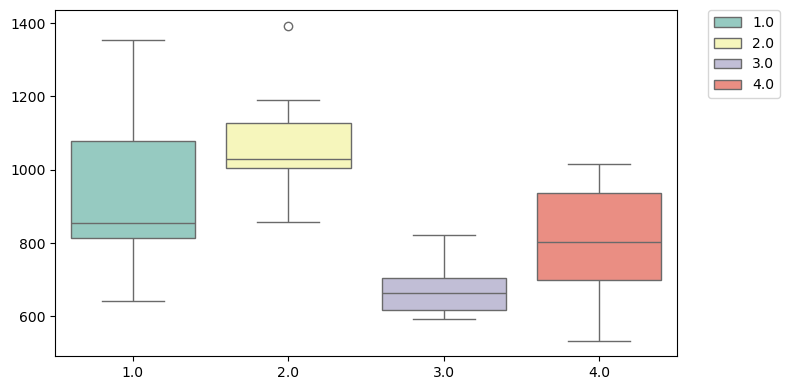

In [67]:
plt.figure(figsize=(8, 4))

box = sns.boxplot(x=sprays[:,1], y=sprays[:,0], hue=sprays[:,1], palette="Set3")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

In [69]:
alpha = 0.05
k = len(np.unique(sprays[:,1]))

group_means = dict(npi.group_by(sprays[:, 1], sprays[:, 0], np.mean))
group_obs = dict(npi.group_by(sprays[:, 1], sprays[:, 0], len))
group_variance = dict(npi.group_by(sprays[:, 1], sprays[:, 0], var))

combs = list(combinations(np.unique(sprays[:, 1]), 2))
combs

[(1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (2.0, 3.0), (2.0, 4.0), (3.0, 4.0)]

In [71]:
group_comps = []
mean_differences = []
degrees_freedom = []
t_values = []
p_values = []
std_err = []
up_conf = []
low_conf = []

for comb in combs:
    # Mean differences of each group combination
    diff = group_means[comb[1]] - group_means[comb[0]]
    
    # t-value of each group combination
    t_val = np.abs(diff) / np.sqrt((group_variance[comb[0]] / group_obs[comb[0]]) + 
                                   (group_variance[comb[1]] / group_obs[comb[1]]))
    
    # Numerator of the Welch-Satterthwaite equation
    df_num = (group_variance[comb[0]] / group_obs[comb[0]] + group_variance[comb[1]] / group_obs[comb[1]]) ** 2
    
    # Denominator of the Welch-Satterthwaite equation
    df_denom = ((group_variance[comb[0]] / group_obs[comb[0]]) ** 2 / (group_obs[comb[0]] - 1) +
                (group_variance[comb[1]] / group_obs[comb[1]]) ** 2 / (group_obs[comb[1]] - 1))
    
    # Degrees of freedom
    df = df_num / df_denom
    
    # p-value of the group comparison
    p_val = psturng(t_val * np.sqrt(2), k, df)

    # Standard error of each group combination
    se = np.sqrt(0.5 * (group_variance[comb[0]] / group_obs[comb[0]] + 
                        group_variance[comb[1]] / group_obs[comb[1]]))
    
    # Upper and lower confidence intervals
    upper_conf = diff + qsturng(1 - alpha, k, df)
    lower_conf = diff - qsturng(1 - alpha, k, df)
    
    # Append the computed values to their respective lists.
    mean_differences.append(diff)
    degrees_freedom.append(df)
    t_values.append(t_val)
    p_values.append(p_val)
    std_err.append(se)
    up_conf.append(upper_conf)
    low_conf.append(lower_conf)
    group_comps.append(str(comb[0]) + ' : ' + str(comb[1]))

In [73]:
result_df = pd.DataFrame({'groups': group_comps,
                          'mean_difference': mean_differences,
                          'std_error': std_err,
                          't_value': t_values,
                          'p_value': p_values,
                          'upper_limit': up_conf,
                          'lower limit': low_conf})

#result_df['p_value'] = result_df.apply(lambda x: x['p_value'][0], axis=1)
result_df['Checker'] = result_df['p_value'] <= 0.05
result_df

,groups,mean_difference,std_error,t_value,p_value,upper_limit,lower limit,Checker
0,1.0 : 2.0,127.925,74.134744,1.220165,[0.6174834537197865],132.130567,123.719433,False
1,1.0 : 3.0,-267.375,66.309668,2.851208,[0.07693976757502952],-262.930994,-271.819006,False
2,1.0 : 4.0,-148.250,76.375453,1.372543,[0.5351409604481432],-144.078242,-152.421758,False
3,2.0 : 3.0,-395.300,45.546721,6.136980,0.001,-391.039068,-399.560932,True
4,2.0 : 4.0,-276.175,59.251511,3.295869,[0.02446583314579731],-272.059234,-280.290766,True
5,3.0 : 4.0,119.125,49.109605,1.715226,[0.3647437983676822],123.426730,114.823270,False
